In [1]:
from sys import path as syspath
from pathlib import Path

syspath.append(str(Path().home() / "pyref" / "src"))

import pyref as rf
import seaborn as sns
import matplotlib.pyplot as plt

db = rf.db()

# Optical Constant Database

* This is not a real database
* Relationships are handled by a .json file
* The json file location is saved to a config file in the module directory


In [2]:
# rf.init_db(path_to_your_db)

# Oriented Optical Constants From NEXAFS (Or DFT)

The `pyref` module provides a simple interface to our database of nexafs data, and to the DFT calculations that we use to simulate it. Additionaly, it provides a simple interface for calculating the optical constants from the DFT calculations. This is done using the `AngleNexafs` class, which is a subclass of the `DataFrame` class. This class overloades the generation method to accept file names as well as the standard `DataFrame` inputs. The `AngleNexafs` class also provides a method for calculating the optical constants from the DFT calculations. This is done using a series of methods. 

The first step is to load the data from a file.


C:\Users\Harlan Heilman\Washington State University (email.wsu.edu)\Carbon Lab Research Group - Documents\Harlan Heilman\.refl\.db\.data\nexafs\C32H16N8Zn.raw


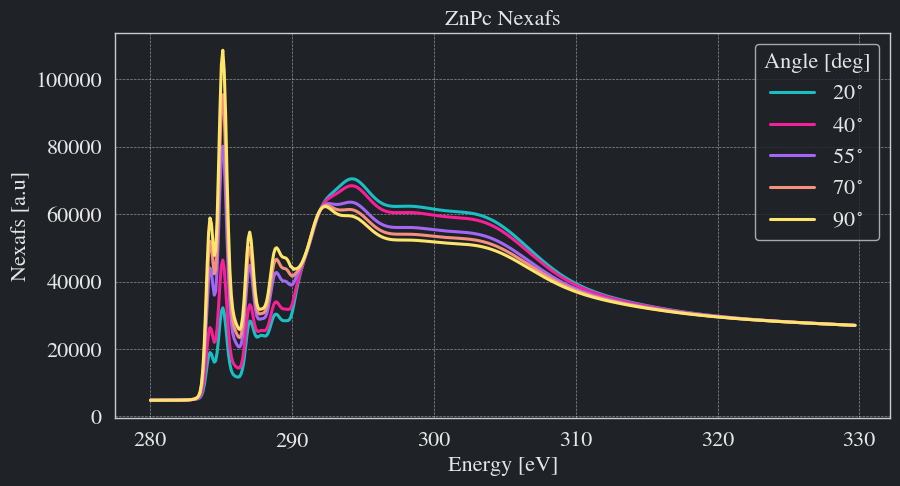

In [3]:
f = db.nexafs / "C32H16N8Zn.raw"
print(f)
dft = rf.AngleNexafs(f, "C32H16N8Zn", density=1.37429051377332, name = "ZnPc")  # type: ignore
dft.plot_ar()

Now that this is done, we compute the difference spectra of the data. As a standard, we use the first and last energies to compute the difference spectra. This is done using the `get_diffspec` method. This method adds a new collumn to the dataframe called 'Diff'. 

,20,40,55,70,90,Diff
Energy [eV],,,,,,
279.999586,4793.8398,4787.5586,4773.2593,4766.6880,4761.0200,-20.5805
280.100006,4794.9214,4788.6357,4773.5957,4766.7251,4760.8813,-21.3257
280.199906,4796.2891,4789.6636,4774.0200,4766.9688,4760.8457,-22.2691
280.299378,4797.5137,4790.8784,4774.6538,4767.3296,4761.0391,-22.8599
280.399842,4799.3608,4792.2939,4775.4473,4767.8291,4761.2002,-23.9135
...,...,...,...,...,...,...
329.300188,27068.4240,27067.0210,27063.5920,27062.0530,27060.7270,-4.8320
329.399116,27048.8110,27047.4430,27044.1990,27042.7170,27041.4650,-4.6120
329.500178,27029.4380,27028.1290,27025.0180,27023.6070,27022.3890,-4.4200


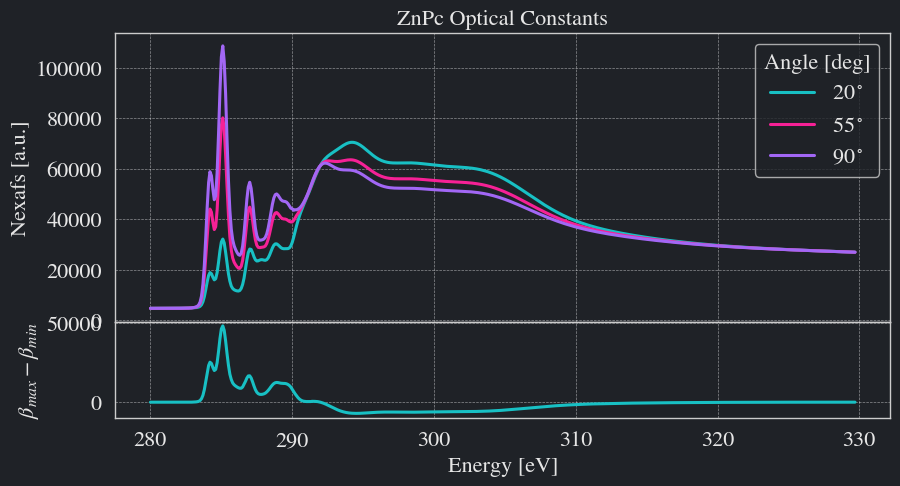

In [4]:
dft.get_diffspec()
dft

## Calculating the oriented optical constants

,20,40,55,70,90,Diff,$\beta_{zz}$,$\beta_{xx}$,$\beta_{iso}$,$\delta_{ba}$,$\beta_{ba}$
Energy [eV],,,,,,,,,,,
279.999586,4793.8398,4787.5586,4773.2593,4766.6880,4761.0200,-20.5805,0.000209,0.000214,0.000212,0.001154,0.000229
280.100006,4794.9214,4788.6357,4773.5957,4766.7251,4760.8813,-21.3257,0.000209,0.000214,0.000212,0.001143,0.000228
280.199906,4796.2891,4789.6636,4774.0200,4766.9688,4760.8457,-22.2691,0.000209,0.000214,0.000212,0.001132,0.000228
280.299378,4797.5137,4790.8784,4774.6538,4767.3296,4761.0391,-22.8599,0.000209,0.000214,0.000212,0.001120,0.000228
280.399842,4799.3608,4792.2939,4775.4473,4767.8291,4761.2002,-23.9135,0.000209,0.000214,0.000212,0.001109,0.000228
...,...,...,...,...,...,...,...,...,...,...,...
329.300188,27068.4240,27067.0210,27063.5920,27062.0530,27060.7270,-4.8320,0.001203,0.001204,0.001203,0.001888,0.001124
329.399116,27048.8110,27047.4430,27044.1990,27042.7170,27041.4650,-4.6120,0.001202,0.001203,0.001202,0.001888,0.001123
329.500178,27029.4380,27028.1290,27025.0180,27023.6070,27022.3890,-4.4200,0.001201,0.001202,0.001202,0.001887,0.001122


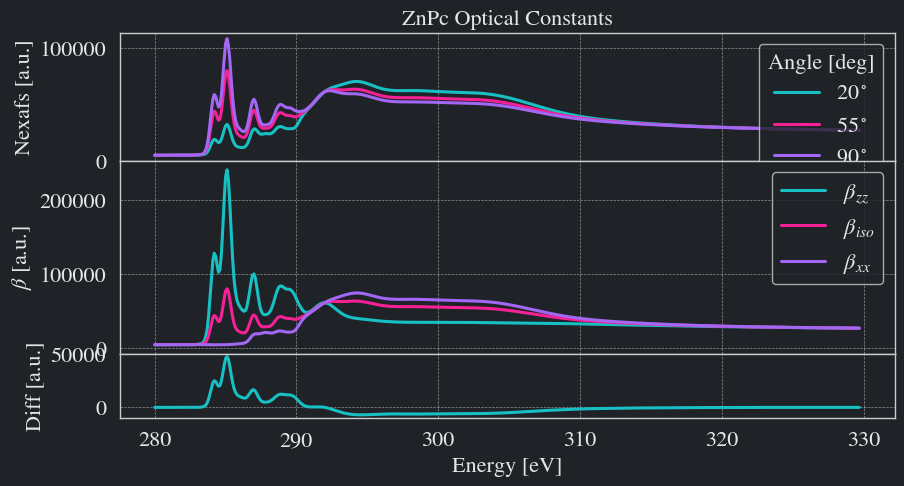

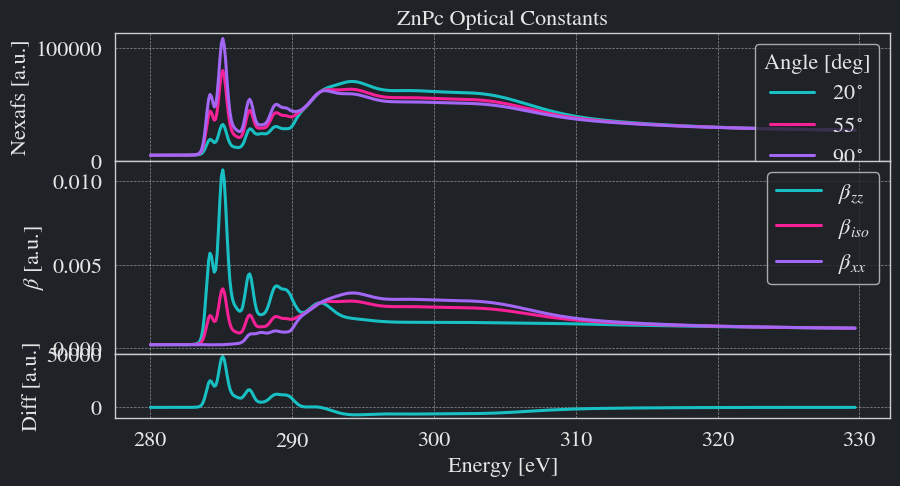

In [5]:
dft.get_ooc(normalize=False) # You can skip this step if you use the default normalize = True
# However, these are not in the same units as optical constants should be
# So instead, we need to normalize the spectra to the bare atom sectra
dft.normalize()
dft.plot_beta()
dft

## Kramers Kronig Transformation

The `get_kk()` method implements the kramers kronig transformation from the `kkcalc` module to calculate the calculate $\delta$. This creates a series of functions that return $\delta$ and $\beta$ for each principle axis (`delta_xx`, `beta_xx`, `delta_zz`, `beta_zz`), the average axis (`delta_iso`, `beta_iso`). These are generated via linear interpolation using the extended energy domain. Additionally, optical constants are calculated over the experimental energy range and added to the dataframe. 

,20,40,55,70,90,Diff,$\beta_{zz}$,$\beta_{xx}$,$\beta_{iso}$,$\delta_{ba}$,$\beta_{ba}$,$\delta_{xx}$,$\delta_{zz}$,$\delta_{iso}$
Energy [eV],,,,,,,,,,,,,,
279.999586,4793.8398,4787.5586,4773.2593,4766.6880,4761.0200,-20.5805,0.000209,0.000214,0.000212,0.001154,0.000229,0.000873,5.763652e-05,0.000612
280.100006,4794.9214,4788.6357,4773.5957,4766.7251,4760.8813,-21.3257,0.000209,0.000214,0.000212,0.001143,0.000228,0.000865,2.965338e-05,0.000598
280.199906,4796.2891,4789.6636,4774.0200,4766.9688,4760.8457,-22.2691,0.000209,0.000214,0.000212,0.001132,0.000228,0.000857,8.449663e-07,0.000583
280.299378,4797.5137,4790.8784,4774.6538,4767.3296,4761.0391,-22.8599,0.000209,0.000214,0.000212,0.001120,0.000228,0.000849,-2.885160e-05,0.000568
280.399842,4799.3608,4792.2939,4775.4473,4767.8291,4761.2002,-23.9135,0.000209,0.000214,0.000212,0.001109,0.000228,0.000841,-5.992833e-05,0.000552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329.300188,27068.4240,27067.0210,27063.5920,27062.0530,27060.7270,-4.8320,0.001203,0.001204,0.001203,0.001888,0.001124,0.002506,2.405315e-03,0.002474
329.399116,27048.8110,27047.4430,27044.1990,27042.7170,27041.4650,-4.6120,0.001202,0.001203,0.001202,0.001888,0.001123,0.002506,2.405790e-03,0.002474
329.500178,27029.4380,27028.1290,27025.0180,27023.6070,27022.3890,-4.4200,0.001201,0.001202,0.001202,0.001887,0.001122,0.002505,2.406263e-03,0.002474


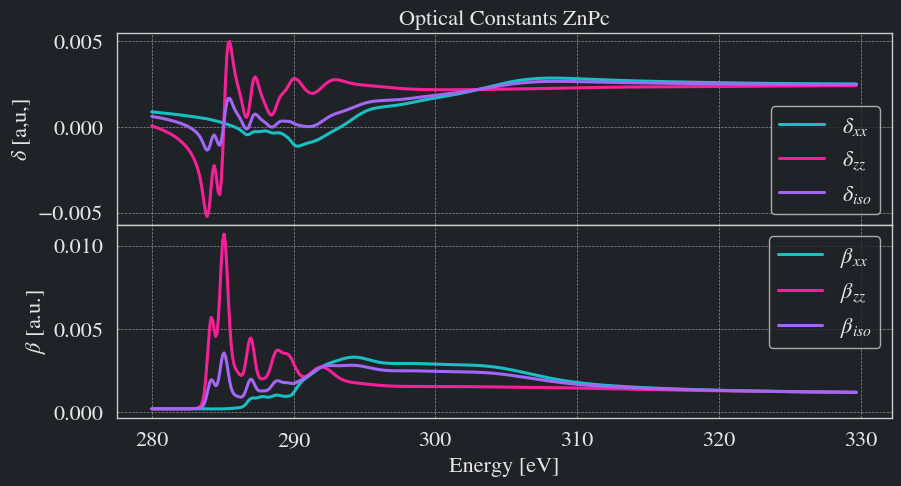

In [6]:
dft.get_kk()
dft.plot_delta_beta()
dft

Since the kramers kronig transformation produces a numerically interpolated function, we can calculate the orpical constants at every point across the measured absorbtion edge.

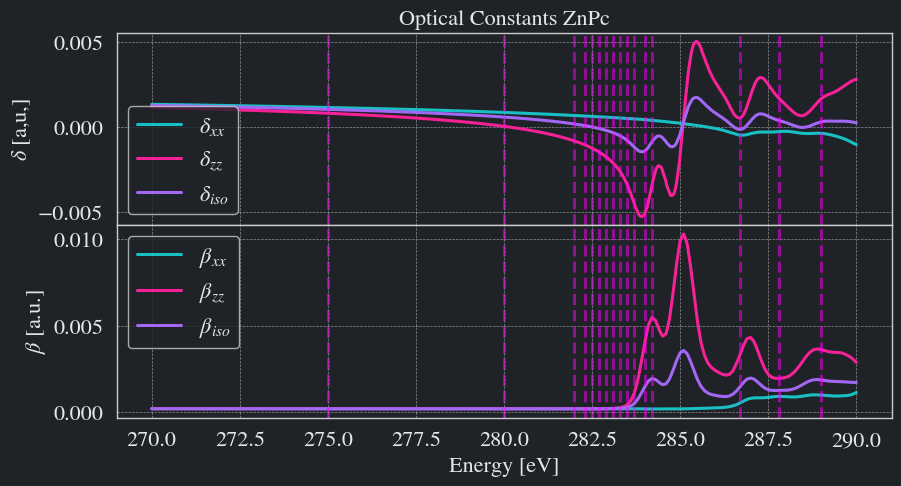

In [7]:
refl_energies = [275, 280, 282, 282.3, 282.5, 282.7, 282.9, 283.1, 283.3, 283.5, 283.7, 284, 284.2, 286.7, 287.8, 289]
dft.plot_delta_beta(en_range = (270,290), energy_highlights=refl_energies, dpi = 1500)

## Saving the data

The `to_db()` method saves the data to a "database"... In reality, it is just a special directory structure that is used to store the data. The directory structure is set up as follows:

### Dicectory Structure

```
.db 
    db.json
    - .data
        - nexafs
        - xrr
    - .ocs
    - .struct
```



In [8]:
dft.to_db()

## Loading Non Angle Resolved Data

By passing in the `angles = None` arguement, the `AngleNexafs` class will load the data as a standard `DataFrame` object. This is useful for loading data from the database for use in other applications. You can then additionally apply all kramers kronig transformations to the data.

In [1]:
c60_f = db.nexafs / "C60.raw"
C60 = rf.AngleNexafs(c60_f, molecular_name = "C60", density=1.65, name = "C60", angles = None, read_kwargs={"sep": "\t"}) # type: ignore
C60.plot_ar()

# apply kk
C60.get_ooc()
C60.get_kk()
C60.plot_delta_beta()
C60.to_db()
C60

NameError: name 'db' is not defined

# Loading Other Materials

The above method uses the `pyref` module to load the data. This is a simple interface to the `pandas` moduel. In some instances, it is easier to load the data directly from the `pandas` module.

,$\beta_{iso}$,$\delta_{iso}$
Energy [eV],,
10.0000,2.830563e-01,-3.955647e-01
10.1617,2.892839e-01,-9.213715e-02
10.3261,2.956436e-01,-4.841477e-02
10.4931,3.021468e-01,-2.923568e-02
10.6628,3.087919e-01,-2.098633e-02
...,...,...
28135.1000,2.284680e-11,3.103671e-07
28590.1990,2.129574e-11,3.005673e-07
29052.6000,1.985096e-11,2.910797e-07


Text(0.5, 1.0, 'Optical Constants PS')

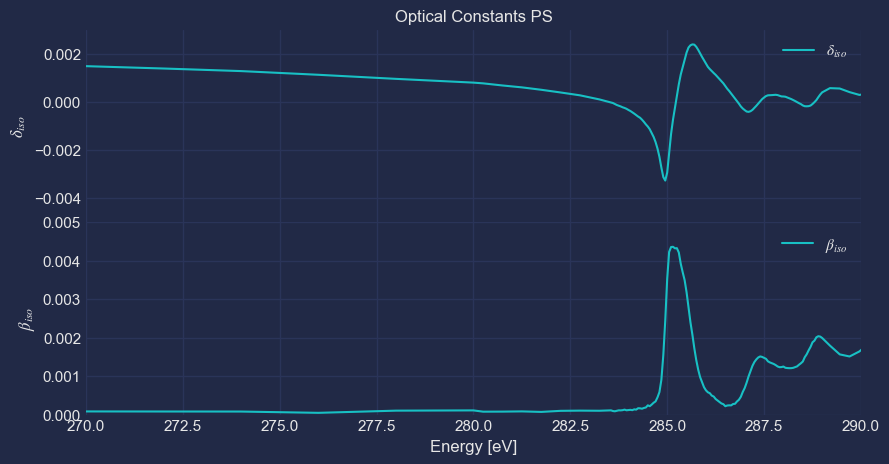

In [ ]:
import pandas as pd

PS = pd.read_csv(db.nexafs / "PS.raw", index_col = 0, sep = "\t", names = [r"$\beta_{iso}$", r"$\delta_{iso}$"], skiprows = 1)
PS.index.name = "Energy [eV]"
display(PS)

fig, ax = plt.subplots(nrows = 2, sharex = True, gridspec_kw={"height_ratios": [1, 1], "hspace": 0})
PS.plot(ax = ax[0], y = r"$\delta_{iso}$", xlim = (270, 290), ylim = (-0.005, 0.003))
PS.plot(ax = ax[1], y = r"$\beta_{iso}$", xlim = (270, 290), ylim = (0, 0.005))

ax[0].set_ylabel(r"$\delta_{iso}$")
ax[1].set_ylabel(r"$\beta_{iso}$")
ax[1].set_xlabel("Energy [eV]")
ax[0].set_title("Optical Constants PS")

In this example, the data is loaded from a csv file where the kramers kronig transforms are allready calculated. Luckily, C60 is a simple material, so we wont be needing orientation data. 

Now, we can plot and compare all the oriented optical constants for the C60 | ZnPc bilayer. 

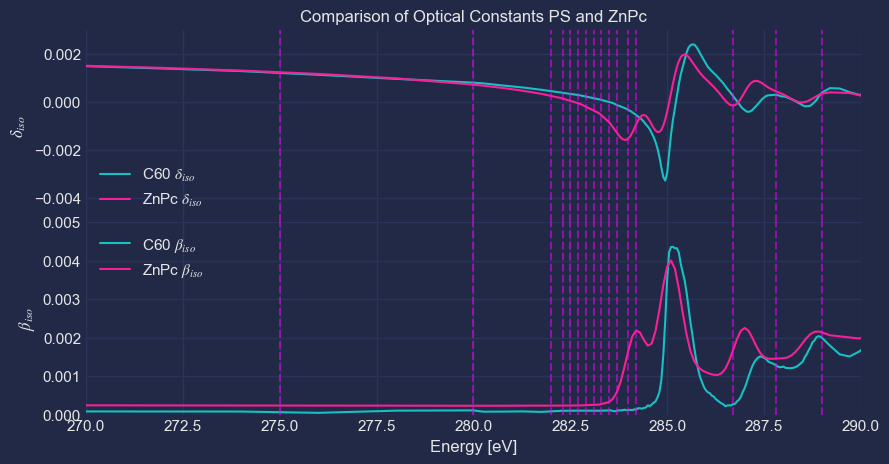

In [ ]:
fig, ax = plt.subplots(nrows = 2, sharex = True, gridspec_kw={"height_ratios": [1, 1], "hspace": 0})
PS.plot(ax = ax[0], y = r"$\delta_{iso}$", xlim = (270, 290), ylim = (-0.005, 0.003))
PS.plot(ax = ax[1], y = r"$\beta_{iso}$", xlim = (270, 290), ylim = (0, 0.005))

ens = PS.index.values

ax[0].plot(ens, dft.iso.delta(ens))
ax[1].plot(ens, dft.iso.beta(ens))

ax[0].set_ylabel(r"$\delta_{iso}$")
ax[1].set_ylabel(r"$\beta_{iso}$")
ax[1].set_xlabel("Energy [eV]")
ax[0].set_title("Comparison of Optical Constants PS and ZnPc")

for en in refl_energies:
    ax[0].axvline(en, color = "magenta", linestyle = "--", alpha = 0.5)
    ax[1].axvline(en, color = "magenta", linestyle = "--", alpha = 0.5)

ax[0].legend([r"C60 $\delta_{iso}$", r"ZnPc $\delta_{iso}$"])
ax[1].legend([r"C60 $\beta_{iso}$", r"ZnPc $\beta_{iso}$"])

## Loading the pandas dataframes into the database

To load a pandas dataframe into the database, we use `df_to_db()`. This method takes a dataframe and a name as inputs. The name is used to create a directory in the database. The dataframe is saved similarly to the `to_db()` method.

In [ ]:
rf.df_to_db(PS, "PS", "iso")

# Figure Generation

In [9]:
import numpy as np


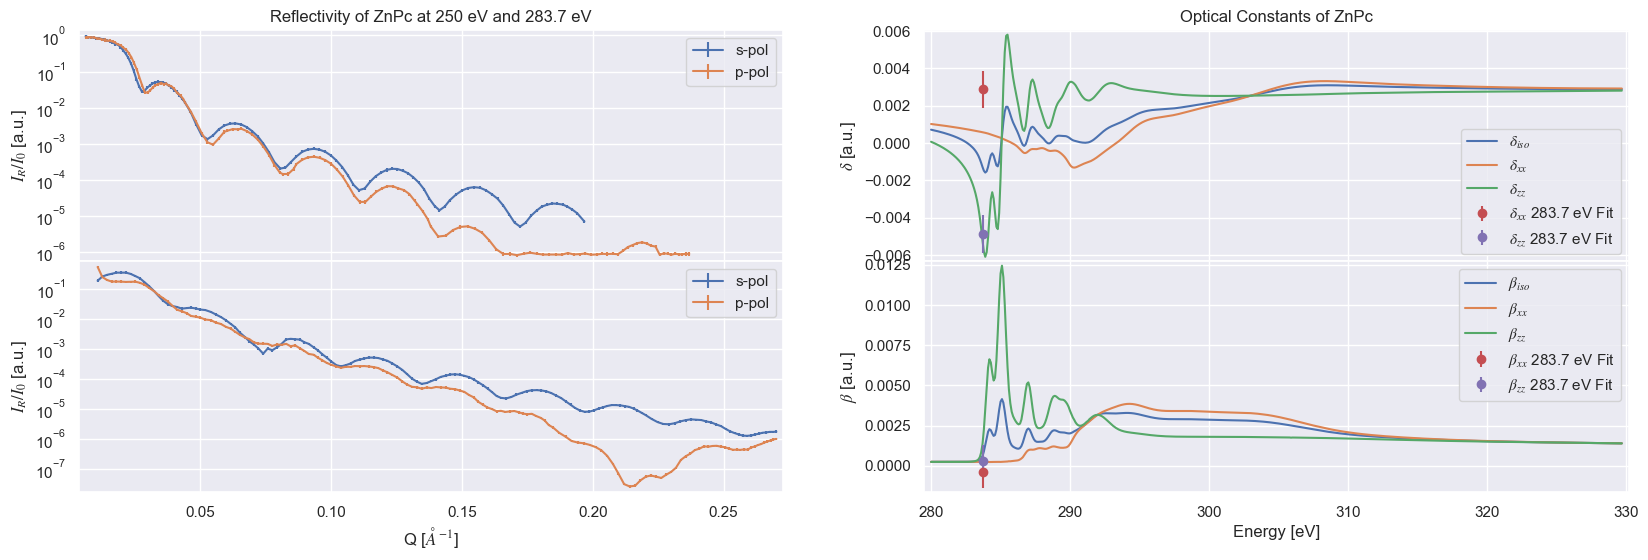

In [14]:
fig, ax = plt.subplots(figsize = (20, 6),nrows = 2, ncols = 2, sharex = "col", gridspec_kw={"hspace": 0})

sns.set_style("darkgrid")


# load refl data

znpc_mono = {
    "250": {
        "s": db.get_refl("zrt_250.0_100.csv", "ZnPc"),
        "p": db.get_refl("zrt_250.0_190.csv", "ZnPc"),
        },
    "283.7": {
        "s": db.get_refl("ZnPc_283.7_100.0 (CCD Scan 82865).parquet", "ZnPc"),
        "p": db.get_refl("ZnPc_283.7_190.0 (CCD Scan 82869).parquet", "ZnPc"),
        },
}

znpc_mono["250"]["s"].iloc[5:].plot(ax = ax[0,0], x = "Q", y = "Refl", yerr = "Err", label = "s-pol")
znpc_mono["250"]["p"].iloc[5:].plot(ax = ax[0,0], x = "Q", y = "Refl", yerr = "Err", label = "p-pol")

znpc_mono["283.7"]["s"].iloc[5:].plot(ax = ax[1,0], x = "Q", y = "Refl", yerr = "Err", label = "s-pol")
znpc_mono["283.7"]["p"].iloc[5:].plot(ax = ax[1,0], x = "Q", y = "Refl", yerr = "Err", label = "p-pol")
#

dft.plot(ax = ax[0,1], y = [r"$\delta_{iso}$", r"$\delta_{xx}$", r"$\delta_{zz}$"])
ax[0,1].errorbar(283.7, fake_xx, yerr = 0.001, label = r"$\delta_{xx}$ 283.7 eV Fit", marker = "o", linestyle = "")
ax[0,1].errorbar(283.7, fake_zz, yerr = 0.001, label = r"$\delta_{zz}$ 283.7 eV Fit", marker = "o", linestyle = "")
dft.plot(ax = ax[1,1], y = [r"$\beta_{iso}$", r"$\beta_{xx}$", r"$\beta_{zz}$"])
ax[1,1].errorbar(283.7, fake_ixx, yerr = 0.001, label = r"$\beta_{xx}$ 283.7 eV Fit", marker = "o", linestyle = "")
ax[1,1].errorbar(283.7, fake_izz, yerr = 0.001, label = r"$\beta_{zz}$ 283.7 eV Fit", marker = "o", linestyle = "")

ax[0,0].legend()
ax[1,0].legend()
ax[0,1].legend()
ax[1,1].legend()

ax[0,0].set(
    xlabel = r"Q [$\AA^{-1}$]",
    ylabel = r"$I_R / I_0$ [a.u.]",
    title = "Reflectivity of ZnPc at 250 eV and 283.7 eV",
    yscale = "log"
)
ax[1,0].set(
    xlabel = r"Q [$\AA^{-1}$]",
    ylabel = r"$I_R / I_0$ [a.u.]",
    yscale = "log"
)
ax[0,1].set(
    ylabel = r"$\delta$ [a.u.]",
    xlabel = "Energy [eV]",
    title = "Optical Constants of ZnPc"
)
ax[1,1].set(
    ylabel = r"$\beta$ [a.u.]",
    xlabel = "Energy [eV]",
)

fig.savefig("ZnPc_283.7_fit.png", dpi = 600)